In [5]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df= pd.read_csv('/content/drive/MyDrive/PJ/csv/tipos/Apple.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
print(df.describe())

       precio_venta          peso  coste_inicial
count  10726.000000  10835.000000   10518.000000
mean       3.488198    300.653820       1.997693
std        0.705466    100.412556       0.499030
min        0.599383    -78.525401       0.139266
25%        3.012608    232.429453       1.654625
50%        3.490128    299.978964       1.997385
75%        3.962480    368.847350       2.337499
max        6.018764    706.148708       3.711528


In [7]:
print(df.head())

         cliente  precio_venta        peso           t_id fecha_venta  \
0  CompraMaestra      4.909680  264.195357    Apple 1.png  2022/09/19   
1  CompraMaestra      3.425103  141.647327   Apple 10.png  2022/09/12   
2  CompraMaestra      3.468746  516.167670  Apple 135.png  2022/09/17   
3  CompraMaestra      4.345632  267.665780  Apple 218.png  2022/09/21   
4  CompraMaestra      3.709716  326.369599  Apple 304.png  2022/09/27   

  hora_venta   tipo fecha_recogida hora_recogida                lote  \
0      12:00  Apple     2022/09/19         08:00     G80V76K49J80T71   
1      02:00  Apple     2022/09/11         19:00    G80V76K49L46V78M   
2      11:00  Apple     2022/09/17         08:00  G80V76K49O53J80T71   
3      11:00  Apple     2022/09/21         09:00  G80V76K50M56J80T71   
4      21:00  Apple     2022/09/27         13:00  G80V76K51L52J80T71   

           marca  coste_inicial                             proveedor  
0  ParaísoFrutal       2.642048  Agricultura Inteligente

In [8]:
df['coste_inicial'] = df['coste_inicial'].round(2)
df['peso'] = df['peso'].round(2)
df['precio_venta'] = df['precio_venta'].round(2)

df.head()

,cliente,precio_venta,peso,t_id,fecha_venta,hora_venta,tipo,fecha_recogida,hora_recogida,lote,marca,coste_inicial,proveedor
0,CompraMaestra,4.91,264.20,Apple 1.png,2022/09/19,12:00,Apple,2022/09/19,08:00,G80V76K49J80T71,ParaísoFrutal,2.64,Agricultura Inteligente TechCultivos
1,CompraMaestra,3.43,141.65,Apple 10.png,2022/09/12,02:00,Apple,2022/09/11,19:00,G80V76K49L46V78M,TropicalSabor,1.70,Semillero Genético BioCampo
2,CompraMaestra,3.47,516.17,Apple 135.png,2022/09/17,11:00,Apple,2022/09/17,08:00,G80V76K49O53J80T71,CosechaDivina,1.88,Apícola EcoMiel
3,CompraMaestra,4.35,267.67,Apple 218.png,2022/09/21,11:00,Apple,2022/09/21,09:00,G80V76K50M56J80T71,ExóticoManjar,2.51,Maquinaria Agrícola Avanzada
4,CompraMaestra,3.71,326.37,Apple 304.png,2022/09/27,21:00,Apple,2022/09/27,13:00,G80V76K51L52J80T71,JugosoAroma,2.24,AgroSuministros del Campo


# **PESO**

Empezamos analizando los PESOS

In [9]:
peso_minimo = df["peso"].min()
peso_maximo = df["peso"].max()
negativos = df[df["peso"] < 0]
nulos = df[df["peso"].isnull()]

print(f"Peso mínimo: {peso_minimo}")
print(f"Peso máximo: {peso_maximo}")
print(f"Total negativos: {len(negativos)}")
print(f"Total nulos: {len(nulos)}")

Peso mínimo: -78.53
Peso máximo: 706.15
Total negativos: 13
Total nulos: 0


In [10]:
df[df["peso"] < 0]["marca"].value_counts()


,count
marca,
EncantoNativo,1
PlacerFrutado,1
GourmetFrutas,1
FrutaDulce,1
DeliciaNaturaleza,1
AromasCelestiales,1
PaladarDorado,1
MaravillaJugosa,1
FiestaSabor,1


In [11]:
df[df["peso"] < 0]["proveedor"].value_counts()

,count
proveedor,
Semillero Genético BioCampo,2
Agricultura Inteligente TechCultivos,2
Energía Renovable AgroSol,1
Ganadería Orgánica TierraFértil,1
Tractores Eficientes Delgado,1
AgroSuministros del Campo,1
Avícola San José,1
BioCosecha Orgánica,1
Herramientas Agroindustriales Gómez,1


In [12]:
df[df["peso"] < 0]["lote"].unique()

array(['G80V76K48M51M56J80T71', 'G80V76K70O48O50N48O46V78M',
       'G80V76K70T56S46V78M', 'G80V76K48M53U48J80T71',
       'G80V76K48P49P53J74V69M', 'C67K78K48S54R49J80T71', 'G80V76K46V78M',
       'G80V76K48N49M56J80T71', 'G80V76K48O49O54J80T71',
       'C67K78K48U57R49J80T71', 'G80V76K69L55M52P46V78M',
       'G80V76K70S55L46V78M', 'G80V76K48M51N50J80T71'], dtype=object)

Revisamos si es una marca o proveedor en específico que tiene negativos pero resultan ser los lotes G80V76K y C67K78K48.

In [13]:
print(negativos["peso"])

539    -14.81
1182    -6.08
1242    -9.39
2933   -37.39
3639    -9.91
4315   -19.65
5130   -67.22
5173   -25.41
5510   -78.53
6273   -23.47
6293   -25.64
6370   -66.10
9448   -11.25
Name: peso, dtype: float64


Para la poca cantidad que son los eliminamos, no tienen sentido tampoco en positivo.

In [14]:
filas_peso_negativo = df[df["peso"] < 0]
print(filas_peso_negativo)

                     cliente  precio_venta   peso                 t_id  \
539          La Tienda Justa          3.89 -14.81      Apple 01318.png   
1182         Tienda Familiar          4.02  -6.08  Apple F _0_2203.png   
1242         Tienda Familiar          2.53  -9.39       Apple F887.png   
2933      Alimentación Total          3.89 -37.39      Apple 01590.png   
3639            CompraRápida          3.27  -9.91     Apple 04145.jpeg   
4315         La Gran Cosecha          4.42 -19.65       scene07661.png   
5130               EcoTienda          2.87 -67.22            Apple.png   
5173               EcoTienda          3.17 -25.41      Apple 02118.png   
5510   El Bazar de la Comida          2.70 -78.53      Apple 03136.png   
6273  Distribuciones del Sol          3.97 -23.47       scene09961.png   
6293  Distribuciones del Sol          2.36 -25.64      applee07144.png   
6370  Distribuciones del Sol          3.59 -66.10       Apple F770.png   
9448        SuperValle Verde          

Reemplazamos todos los valores negativos por NaN


In [15]:
df["peso"] = df["peso"].mask(df["peso"] < 0)

In [16]:
print("Cantidad de pesos mayores de 450 g:", len(df[df['peso'] > 450]))
print("Peso máximo:", df.loc[df['peso'] > 450, 'peso'].max())

Cantidad de pesos mayores de 450 g: 735
Peso máximo: 706.15


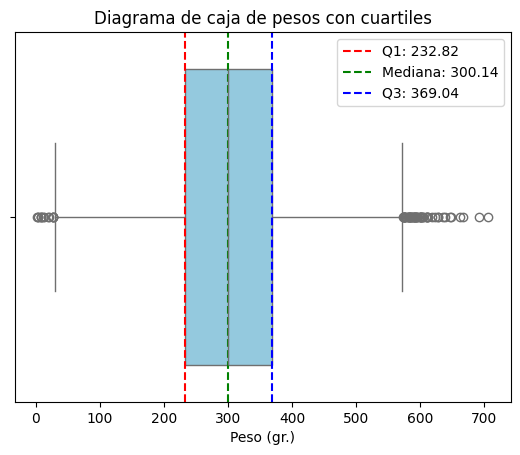

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

costes = df["peso"].dropna()


q1 = costes.quantile(0.25)
q2 = costes.quantile(0.50)
q3 = costes.quantile(0.75)

sns.boxplot(x=costes, orient='h', color='skyblue')

plt.axvline(q1, color='red', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='green', linestyle='--', label=f'Mediana: {q2:.2f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3: {q3:.2f}')

plt.title('Diagrama de caja de pesos con cuartiles')
plt.xlabel('Peso (gr.)')
plt.legend()

plt.show()

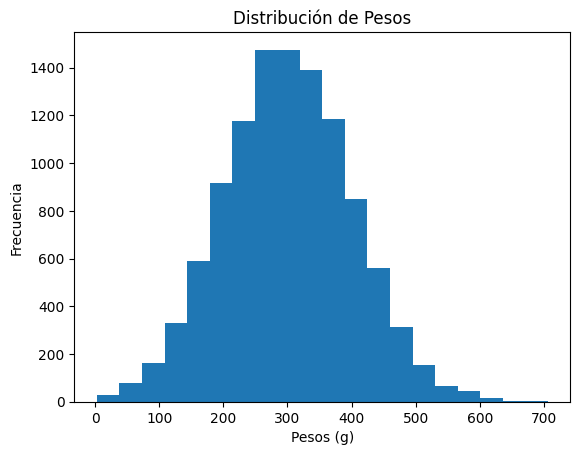

In [18]:
plt.hist(df["peso"].dropna(), bins=20)
plt.title('Distribución de Pesos')
plt.xlabel('Pesos (g)')
plt.ylabel('Frecuencia')
plt.show()

In [19]:
Q1_pe = df["peso"].quantile(0.25)
Q3_pe = df["peso"].quantile(0.75)
IQR_pe = Q3_pe - Q1_pe
outliers_pe = df[df["peso"] > Q3_pe + 1.5 * IQR_pe]

print("Total outliers:", outliers_pe["peso"].count())
print(Q1_pe)
print(Q3_pe)
print(IQR_pe)

Total outliers: 58
232.8225
369.0375
136.21500000000003


In [20]:
print(df[['peso', 't_id']].dropna(subset=['peso']).sort_values(by='peso'))

         peso                 t_id
4443     2.97       Apple F176.png
10541    3.35        Apple 637.png
138      4.03  Apple F _0_8715.png
9980     7.98      applee07139.png
2414     9.00       scene08961.png
...       ...                  ...
6004   647.48       Apple E142.png
5795   662.37      Apple 02520.png
8618   665.99      Apple 02851.png
1551   691.05       Apple F110.png
10300  706.15   Apple dee04281.png

[10822 rows x 2 columns]


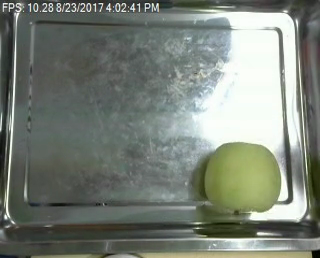

In [21]:
from IPython.display import Image, display

image_path = '/content/drive/MyDrive/PJ/archive/Apple/Total Number of Apples/Apple 02520.png'

try:
    display(Image(filename=image_path))
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta {image_path}. Por favor, verifica la ruta de tu imagen.")
except Exception as e:
    print(f"Ocurrió un error al cargar la imagen: {e}")

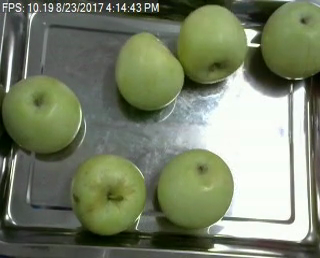

In [22]:
from IPython.display import Image, display

image_path = '/content/drive/MyDrive/PJ/archive/Apple/Total Number of Apples/Apple 02774.png'

try:
    display(Image(filename=image_path))
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta {image_path}. Por favor, verifica la ruta de tu imagen.")
except Exception as e:
    print(f"Ocurrió un error al cargar la imagen: {e}")

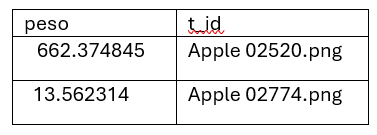

En la primera imagen la cuarta con más peso con 1 sola manzana y parece más pequeña que las anteriores.
En la segunda imagen  vemos la imagen con menos peso con 6 manzanas y uno de los pesos más bajos.
Esto hemos verificado que pasa con diferentes imagenes por lo que creemos que los pesos no son correctos. Además de los dos ejemplos mostrados añadimos algunos ejemplos más para ver que algunos pesos no son correctos.
En el caso de varias manzanas y poco peso tenemos los siguientes ejemplos:
Apple F _0_8715.png, applee07139.png, Apple F176.png ...
En el caso de una o dos manzanas y bastante peso:
Apple F469.png, scene13041.png, Apple F463.png ...
Además creemos que los pesos más bajos son demasiado bajos para el peso de una manzana.

Dejo los pesos aquí y veremos más adelante. Empiezamos con coste inicial.


# **COSTE INICIAL**

In [23]:
coste_inicial_min = df["coste_inicial"].min()
coste_inicial_max = df["coste_inicial"].max()
negativos_coste = df[df["coste_inicial"] < 0]
nulos_coste = df[df["coste_inicial"].isnull()]

print(f"Coste inicial mínimo: {coste_inicial_min}")
print(f"Coste inicial máximo: {coste_inicial_max}")
print(f"Coste inicial negativos: {len(negativos_coste)}")
print(f"Coste inicial nulos: {len(nulos_coste)}")

Coste inicial mínimo: 0.14
Coste inicial máximo: 3.71
Coste inicial negativos: 0
Coste inicial nulos: 317


No encontramos negativos y los costes iniciales van desde los 0.13 hasta los 3.71


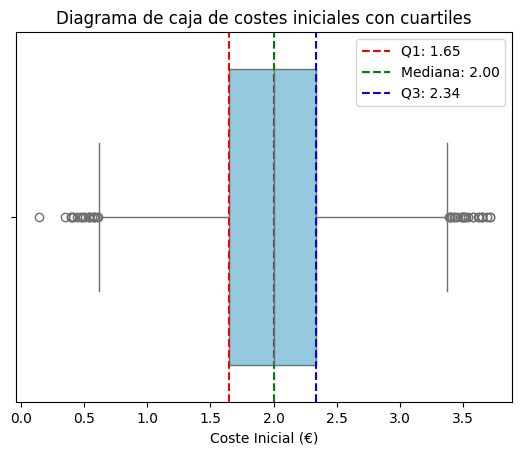

In [24]:
costes = df["coste_inicial"].dropna()


q1 = costes.quantile(0.25)
q2 = costes.quantile(0.50)
q3 = costes.quantile(0.75)

sns.boxplot(x=costes, orient='h', color='skyblue')

plt.axvline(q1, color='red', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='green', linestyle='--', label=f'Mediana: {q2:.2f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3: {q3:.2f}')

plt.title('Diagrama de caja de costes iniciales con cuartiles')
plt.xlabel('Coste Inicial (€)')
plt.legend()

plt.show()

En el gráfico se ven muchos outliers. Vamos a ver en otro gráfico como visualizamos los datos.

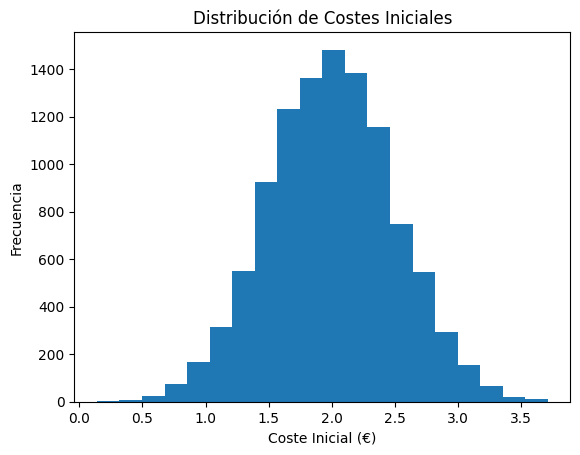

In [25]:
plt.hist(df["coste_inicial"].dropna(), bins=20)
plt.title('Distribución de Costes Iniciales')
plt.xlabel('Coste Inicial (€)')
plt.ylabel('Frecuencia')
plt.show()

In [26]:
Q1_ci = df["coste_inicial"].quantile(0.25)
Q3_ci = df["coste_inicial"].quantile(0.75)
IQR_ci = Q3_ci - Q1_ci
outliers_ci = df[df["coste_inicial"] > Q3_ci + 1.5 * IQR_ci]

print("Total outliers:", outliers_ci["coste_inicial"].count())
print(Q1_ci)
print(Q3_ci)
print(IQR_ci)

Total outliers: 26
1.65
2.34
0.69


Una vez analizados los costes iniciales y viendo que tenemos 56 outliers y el resto de costes se mueven en la media deben de ser excepciones por algún motivo de calidad, tamaño o imperfecciones de la fruta.

Pasamos a analizar los precios de venta:

# **PRECIO VENTA**

In [27]:
peso_minimo_pv = df["precio_venta"].min()
peso_maximo_pv = df["precio_venta"].max()
negativos_pv = df[df["precio_venta"] < 0]
nulos_pv = df[df["precio_venta"].isnull()]

print(f"Precio venta mínimo: {peso_minimo_pv}")
print(f"Precio venta máximo: {peso_maximo_pv}")
print(f"Total negativos: {len(negativos_pv)}")
print(f"Total nulos: {len(nulos_pv)}")

Precio venta mínimo: 0.6
Precio venta máximo: 6.02
Total negativos: 0
Total nulos: 109


Sabemos que las frutas que no tienen datos de venta es fruta que no ha podido ser vendida porque ha sido dañada durante la distribución. Vamos a comprobar si tienen fecha de venta.

In [28]:
display(nulos_pv[nulos_pv["fecha_venta"].isnull()])

,cliente,precio_venta,peso,t_id,fecha_venta,hora_venta,tipo,fecha_recogida,hora_recogida,lote,marca,coste_inicial,proveedor
9892,MegaAhorro,NaN,368.33,Apple 323.png,NaN,NaN,Apple,2022/09/17,07:00,G80V76K51N51J80T71,FantasíaDelicia,2.2,Mallas AgroProtección García


Tan solo uno de los 109 nulos es un producto dañado y que, por lo tanto, no ha sido vendido. El resto ha sufrido una perdida de información o esta información no ha sido registrada correctamente.

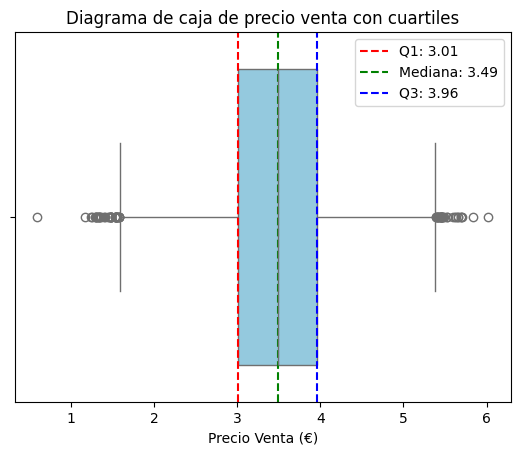

In [29]:
costes = df["precio_venta"].dropna()


q1 = costes.quantile(0.25)
q2 = costes.quantile(0.50)
q3 = costes.quantile(0.75)

sns.boxplot(x=costes, orient='h', color='skyblue')

plt.axvline(q1, color='red', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='green', linestyle='--', label=f'Mediana: {q2:.2f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3: {q3:.2f}')

plt.title('Diagrama de caja de precio venta con cuartiles')
plt.xlabel('Precio Venta (€)')
plt.legend()

plt.show()

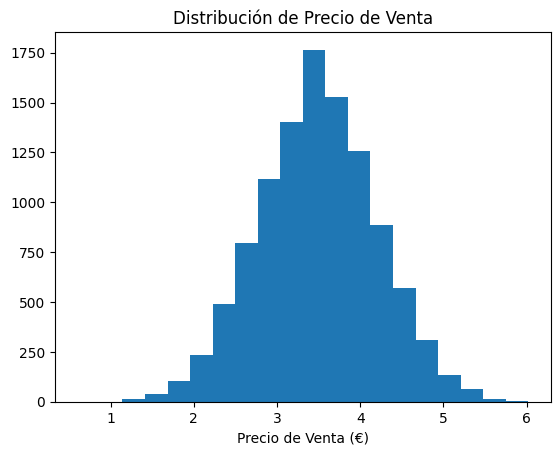

In [30]:
plt.hist(df["precio_venta"].dropna(), bins=20)
plt.title('Distribución de Precio de Venta')
plt.xlabel('Precio de Venta (€)')
plt.ylabel('')
plt.show()

In [31]:
Q1_pv = df["precio_venta"].quantile(0.25)
Q3_pv = df["precio_venta"].quantile(0.75)
IQR_pv = Q3_pv - Q1_pv
outliers_pv = df[df["precio_venta"] > Q3_pv + 1.5 * IQR_pv]

print("Total outliers:", outliers_pv["precio_venta"].count())
print(Q1_pv)
print(Q3_pv)
print(IQR_pv)

Total outliers: 31
3.01
3.96
0.9500000000000002


En precio venta tenemos 58 outliers mientras que en coste inicial teníamos 56.

In [32]:
outliers_pv_ci = pd.merge(outliers_ci, outliers_pv, on='t_id', how='inner')
outliers_pv_ci

,cliente_x,precio_venta_x,peso_x,t_id,fecha_venta_x,hora_venta_x,tipo_x,fecha_recogida_x,hora_recogida_x,lote_x,...,peso_y,fecha_venta_y,hora_venta_y,tipo_y,fecha_recogida_y,hora_recogida_y,lote_y,marca_y,coste_inicial_y,proveedor_y
0,SuperAhorro Express,5.41,328.28,Apple 0277.png,2022/09/16,08:00,Apple,2022/09/15,23:00,G80V76K48N55S46V78M,...,328.28,2022/09/16,08:00,Apple,2022/09/15,23:00,G80V76K48N55S46V78M,EncantoNativo,3.40,RiegoSmart Innovación
1,Delicias del Campo,5.69,118.88,applee13281.png,2022/09/29,06:00,Apple,2022/09/28,22:00,G80V76K69M51N56M46V78M,...,118.88,2022/09/29,06:00,Apple,2022/09/28,22:00,G80V76K69M51N56M46V78M,DeliciosoEdén,3.49,BioCosecha Orgánica
2,Alimentos Premium,6.02,307.67,ne01961.png,2022/09/20,20:00,Apple,2022/09/20,12:00,T69L49U54M46V78M,...,307.67,2022/09/20,20:00,Apple,2022/09/20,12:00,T69L49U54M46V78M,TesoroNaturaleza,3.71,AgroQuímicos Naturales BioCultivos
3,Cosecha Fresca,5.70,423.25,Apple 04232.jpeg,2022/09/21,17:00,Apple,2022/09/21,12:00,G80V76K48P50O50J74V69M,...,423.25,2022/09/21,17:00,Apple,2022/09/21,12:00,G80V76K48P50O50J74V69M,AventuraFrutal,3.41,Maquinaria Agrícola Avanzada


Coinciden solamente 5 de estos por lo que consideramos que no es algo relevante.

Vamos a comprobar la norma que tenemos que cumplir que desde día de recogida hasta fecha venta tiene que pasar al menos un día.

In [33]:
df['fecha_venta'] = pd.to_datetime(df['fecha_venta'], errors='coerce')
df['fecha_recogida'] = pd.to_datetime(df['fecha_recogida'], errors='coerce')

tiempo_diferencia = df['fecha_venta'] - df['fecha_recogida']

al_menos_un_dia = (tiempo_diferencia >= pd.Timedelta(days=1)).all()

print(f"Es verdad que desde fecha_recogida y fecha_venta pasa al menos un día? {al_menos_un_dia}")

Es verdad que desde fecha_recogida y fecha_venta pasa al menos un día? False


In [34]:
tiempo_diferencia.min()

Timedelta('-29 days +00:00:00')

In [35]:
tiempo_diferencia.sort_values()

,0
5310,-29 days
6296,-28 days
1936,-27 days
1421,-27 days
4602,-27 days
...,...
9622,NaT
9892,NaT
10056,NaT
10353,NaT


Nos encontramos con datos negativos.
Sabemos que no se pueden realizar reservas antes de la recogida por lo que es un error y la norma no se cumple.

**No en todos los productos pasan 24 horas mínimo desde la recogida hasta la venta.**

El peso está en gramos. Vamos a comprobar si a cada proveedor no se le venden más de 100Kg de fruta en un solo día.

In [36]:
venta_dia = df.groupby(['proveedor', 'fecha_venta'])['peso'].sum()

mayor_100kg = (venta_dia > 100000).any()

print(f"¿Algún proveedor recibe más de 100 kg en un solo día? {mayor_100kg}")

¿Algún proveedor recibe más de 100 kg en un solo día? False


No se le vende más de 100Kg de manzanas a un proveedor en un solo día.

**En el caso de las manzanas esta norma se cumple.**

Vamos a comprobar que 1 lote solo contiene un tipo de fruta y de una sola marca.

In [37]:
lote_check = df.groupby('lote').agg({
    'tipo': 'nunique',
    'marca': 'nunique'
}).reset_index()

tipo_check = lote_check[lote_check['tipo'] > 1]
marca_check = lote_check[lote_check['marca'] > 1]

if tipo_check.empty and marca_check.empty:
    print("Cada lote solo contiene un tipo de fruta o una marca.")
else:
    print("Norma incumplida:")
    if not tipo_check.empty:
        print("\nLotes con más de un tipo de fruta:")
        display(tipo_check)
    if not marca_check.empty:
        print("\nLotes con más de una marca:")
        display(marca_check)

Norma incumplida:

Lotes con más de una marca:


,lote,tipo,marca
7322,G80V76K69L48M46V78M,1,2
7333,G80V76K69L48N46V78M,1,2
7336,G80V76K69L48O46V78M,1,2
7337,G80V76K69L48P46V78M,1,2
7338,G80V76K69L48Q46V78M,1,2
...,...,...,...
7547,G80V76K69L56M55M46V78M,1,2
7572,G80V76K69L57M56P46V78M,1,2
7573,G80V76K69L57M56Q46V78M,1,2
7574,G80V76K69L57M56R46V78M,1,2


En un solo lote con las manzanas no encontramos más de un tipo de fruta pero sí más de una marca.
**Esta norma tampoco se cumple.**

In [38]:
df = df.dropna(subset=['coste_inicial', 'precio_venta'])
df = df[df['coste_inicial'] != 0]
df['rentabilidad'] = ((df['precio_venta'] - df['coste_inicial']) / df['coste_inicial']) * 100

df_lote = df.groupby('lote', as_index=False)[['coste_inicial', 'precio_venta', 'rentabilidad']].mean()

corr = df_lote[['coste_inicial', 'precio_venta', 'rentabilidad']].corr()
display(corr)

,coste_inicial,precio_venta,rentabilidad
coste_inicial,1.000000,0.677430,-0.593641
precio_venta,0.677430,1.000000,0.086992
rentabilidad,-0.593641,0.086992,1.000000


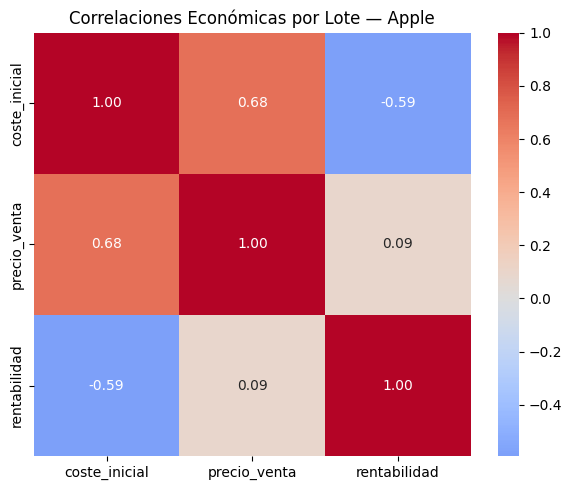

In [39]:
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlaciones Económicas por Lote — Apple')
plt.tight_layout()
plt.show()

La clave para mejorar la rentabilidad no es subir precios, sino reducir costes o ajustar mejor el precio de venta por lote.

In [40]:
correlacion = df['coste_inicial'].corr(df['peso'])
correlacion

np.float64(0.007726238669720652)

In [41]:
correlacion2 = df['coste_inicial'].corr(df['precio_venta'])
correlacion2

np.float64(0.6786763077779683)

In [42]:
correlacion3 = df['precio_venta'].corr(df['peso'])
correlacion3

np.float64(0.0059053793791914245)

               precio_venta  coste_inicial      peso
precio_venta       1.000000       0.678676  0.005905
coste_inicial      0.678676       1.000000  0.007726
peso               0.005905       0.007726  1.000000


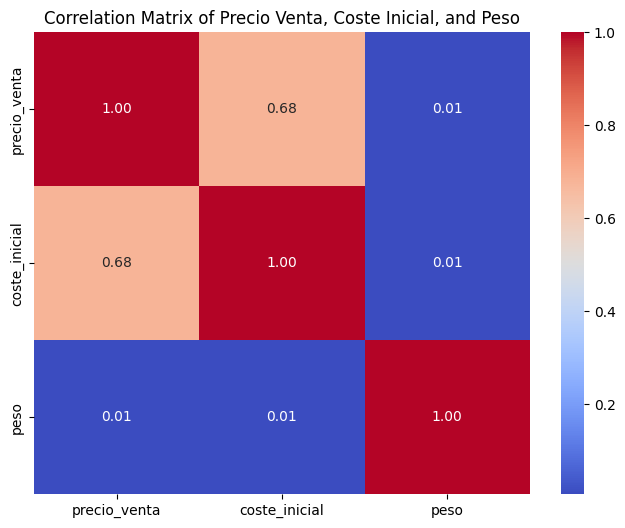

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df[['precio_venta', 'coste_inicial', 'peso']].corr()

print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Precio Venta, Coste Inicial, and Peso')
plt.show()

Las correlaciones entre coste inicial y precio venta son de 0.678 mientras que no encontramos correlación entre precio venta y peso ni entre coste inicial y peso.
Creemos que esto debería estar totalmente relacionado ya que a mayor peso deberia tener un coste o precio mayor.
Esto refuerza la teoria que exponemos de que los pesos no son correctos.

Aqui dejamos el analisis de las manzanas y pasamos a analizar la siguiente fruta.